## Something funny for Pandas

In [1]:
import pandas as pd

In [13]:
df = pd.read_csv("data/interviews.csv")
print(df.shape)
df.head(n = 5)

(17654, 10)


,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
0,Apple,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,Application I applied through a staffing agen...
1,Apple,Software Engineer,Software Engineer,Engineer,"Aug 8, 2019",0,Accepted offer,1.0,Hard,Application I applied online. The process too...
2,Apple,Software Engineer,Software Engineer,Engineer,NaN,0,Declined offer,0.0,Medium,Application The process took 4 weeks. I inter...
3,Apple,Software Engineer,Software Engineer,Engineer,NaN,9,Declined offer,-1.0,Medium,Application The process took a week. I interv...
4,Apple,Software Engineer,Software Engineer,Engineer,"May 29, 2009",2,No offer,0.0,Medium,Application I applied through an employee ref...


#### fetch the series of `Date` column

In [3]:
%timeit -n1000 df['Date']

15.8 µs ± 3.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### fetch the first row

In [4]:
%timeit -n1000 df.iloc[0]

566 µs ± 103 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 1. Iterating over rows

#### 1.1 .apply()

[Iterration에 대한 Warning](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#iteration)

In [5]:
%timeit -n1 df.apply(lambda x:x['Experience'] * x['Upvotes'], axis = 1)

The slowest run took 4.06 times longer than the fastest. This could mean that an intermediate result is being cached.
1.84 s ± 659 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 1.2 . iterrows() na d.itemtuples()

In [6]:
%timeit -n1 [row for index, row in df.iterrows()]  # 매우 느리다.

5.16 s ± 499 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
for index, row in df.iterrows():
    print(row)
    break

Company                                                   Apple
Title                                         Software Engineer
Job                                           Software Engineer
Level                                                  Engineer
Date                                                Aug 7, 2019
Upvotes                                                       0
Offer                                                  No offer
Experience                                                    0
Difficulty                                               Medium
Review        Application  I applied through a staffing agen...
Name: 0, dtype: object


In [8]:
%timeit -n1 [row for row in df.itertuples()]  #iterrow에 비해 몇백배 빠름.

133 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
import numpy as np
n1 = np.random.randn(3) 
print(n1) 
df = pd.DataFrame(data = {
                            'col1': np.random.randn(3),
                            'col2': np.random.randn(3) 
                          }
                         ,index = ['a', 'b', 'c']   
                 )
for col in df:
    print(col)

[ 0.99586654 -1.71697588 -1.52590987]
col1
col2


#### 1.3 Converting DataFrame to row-major order

만약, 데이터프레임에 대해서 Row-by-Row로 어떤 작업을 해야한다면 해당 데이터프레임을 numpy.ndarray타입으로 바꾸고 해라.

In [10]:
%timeit -n1 df_np = df.to_numpy(); rows = [row for row in df_np]

The slowest run took 4.54 times longer than the fastest. This could mean that an intermediate result is being cached.
66.4 µs ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
df_no = df.to_numpy()
%timeit -n1000 df_no[0]
%timeit -n1000 df_no[:,0]

977 ns ± 73.2 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.33 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### 1.4 Ordering slicing operations

In [14]:
%timeit -n1000 df['Review'][0]
%timeit -n1000 df.iloc[0]['Review']
%timeit -n1000 df.loc[0, 'Review']  # 가장 빠른 방법

92.7 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
657 µs ± 74.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
33 µs ± 2.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 2.SettingWithCopyWarning
* 아래 두가지 방법중에 하나는 정상적으로 동작하지 않는다.

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

df['Review'][0] = "I Like Orange better."
#df['Company'] = "Orange"
df.head()

df[df['Company'] == 'Apple']['Company'] = "Orange" 

#### 2.1 View v.s Copy

In [ ]:
df["Review"][0] = "I like Orange better."
# can be understood as
#'df.__getitem__("Review").__setitem__(0, "I like Orange better.")`

In [ ]:
df[df["Company"] == "Apple"]["Company"] = "Orange"
# can be understood as
df.__getitem__(where df["Company"] == "Apple").__setitem__("Company", "Orange")

#### 2.2 Solution
* 위와 같이 정상 작동이 안되는 경우가 발생하므로, 아래와 같은 방법을 사용하도록 권고한다.

In [ ]:
df.loc[df["Company"]== "Apple", "Company"] = "Orange"
df.tail()

In [ ]:
df.loc[0, "Review"] = "Orange is love for my life."
df.head(n = 10)

#### 2.2.1 raise an error

In [ ]:
pd.set_option("mode.chained_assignment", "raise")

In [ ]:
# Running this will show you an Exception
# 이렇게 쓰면 안된다고 에러를 낸다.
# df["Review"][0] = "I like orange better"

## 3.Indexing and slicing

#### 3.1 .iloc[] : 위치기반 인덱스로 로우 선택

In [ ]:
df.head(n =5)

In [ ]:
df.iloc[3]

In [ ]:
# selecting the last 6 rows
df.iloc[-6:] 

In [ ]:
df.iloc[-6::2] # 2개씩 건너뛰고 보여줘.

#### 3.2. loc : 명칭기반 인덱스  혹은 불린 인덱싱 
* boolean indexing
* label명칭기반

#### [boolean indexing] 
제안을 거절한 인터뷰 대상자를 뽑아 주세요.

In [ ]:
df.loc[df['Offer']=='Declined offer']

In [ ]:
mask = df['Offer']=='Declined offer'
mask
df.loc[mask]

#### labels로 뽑아오기 

In [15]:
def attach_label(company):
    hardware_companies = set(["Orange", "Dell", "IBM", "Siemens"])
    if company in hardware_companies:
        type = "Hardware"
    else:
        type = "Software"
    return type

In [16]:
df["Type"] = df['Company'].apply(lambda x:attach_label(x))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17654 entries, 0 to 17653
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     17654 non-null  object 
 1   Title       17654 non-null  object 
 2   Job         17654 non-null  object 
 3   Level       17654 non-null  object 
 4   Date        17652 non-null  object 
 5   Upvotes     17654 non-null  int64  
 6   Offer       17654 non-null  object 
 7   Experience  16365 non-null  float64
 8   Difficulty  16376 non-null  object 
 9   Review      17654 non-null  object 
 10  Type        17654 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.5+ MB


,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review,Type
0,Apple,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,Application I applied through a staffing agen...,Software
1,Apple,Software Engineer,Software Engineer,Engineer,"Aug 8, 2019",0,Accepted offer,1.0,Hard,Application I applied online. The process too...,Software
2,Apple,Software Engineer,Software Engineer,Engineer,NaN,0,Declined offer,0.0,Medium,Application The process took 4 weeks. I inter...,Software
3,Apple,Software Engineer,Software Engineer,Engineer,NaN,9,Declined offer,-1.0,Medium,Application The process took a week. I interv...,Software
4,Apple,Software Engineer,Software Engineer,Engineer,"May 29, 2009",2,No offer,0.0,Medium,Application I applied through an employee ref...,Software


In [ ]:
df['Type'].value_counts()

In [ ]:
df.head()

In [17]:
df = df.set_index(keys = "Type")

In [ ]:
df.head()

In [ ]:
df.loc["Hardware"]

In [18]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df.head()

#### Slicing series

In [ ]:
series_com = df.Company

In [ ]:
series_com.index

In [ ]:
series_com[16900: 17000] # make sure that the end point would be exluded in the result set.

### 4. Acceessor

#### 4.1 .str 내장함수를 이용한 문자열 다루기

In [ ]:
# Review를 소문자로 보여줄까?
df.loc[:,'Review'].str.lower()

In [19]:
df['The_Longest_Review'] = df.loc[:,"Review"].str.len()

#### 가장 할 얘기가 많았던 회사는 어디 일까?

In [20]:
MaxHit = df['The_Longest_Review'].max()
df.loc[df['The_Longest_Review']== MaxHit]

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review,The_Longest_Review
6077,Google,Software Engineer,Software Engineer,Engineer,"Apr 12, 2015",17,Accepted offer,0.0,Hard,Application I applied online. The process too...,6623


#### 인터뷰 일정을 새로히 표현해보면.

In [21]:
df.loc[df["Review"].str.contains("days"), "Process"] = "Short"
df.loc[df["Review"].str.contains("week"), "Process"] = "Average"
df.loc[df["Review"].str.contains("month|[4-9]+[^ ]* weeks|[1-9]\d{1,}[^ ]* weeks"), "Process"] = "Long"

In [ ]:
df[df.Process.isna()][["Review", "Process"]]

#### Review를 보고 싶은데 짤린다면..길게 보자

In [22]:
pd.set_option('display.max_colwidth', 100)
df[df.Process.isna()][["Review", "Process"]]

,Review,Process
0,"Application I applied through a staffing agency. I interviewed at Apple (Sunnyvale, CA) in Marc...",NaN
4,Application I applied through an employee referral. The process took 1 day. I interviewed at Ap...,NaN
8,Application I applied online. I interviewed at Apple. Interview 1. introduce yourself. decryp...,NaN
11,Interview Phone interview then onsite interview. Phone was pretty easy and onsite included only...,NaN
12,"Interview I got two phone interviews, one is non-technical interview and the other is a technic...",NaN
...,...,...
17644,"Interview Introduce myself, talk about the projects I did in the past, and ask some basic quest...",NaN
17646,Application I applied through an employee referral. The process took 1 day. I interviewed at Te...,NaN
17650,Application I applied through college or university. I interviewed at Tencent. Interview Prof...,NaN
17651,Application I applied through college or university. The process took 1 day. I interviewed at T...,NaN


In [ ]:
# str accessor로 쓸수 있는 API
pd.Series.str.__dict__.keys()

#### 4.2 기타 다른 accessor
* `.dt` : date format관련
* `.cat` : 범주형 데이터 처리
* `.sparse` : sparse matricx

In [ ]:
pd.Series._accessors

## 5. EDA

### 5.1 .tail(), .head(), describe(), .info()

In [ ]:
df.tail(n = 3)

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
# 데이터프레임이 차지하고 있는 공간 확인
import sys
df.apply(sys.getsizeof)

### 5.2 중복되지 않는 값에 대한 갯수 nunique()

In [ ]:
df.Company.nunique()

In [ ]:
df.Company.value_counts()

### 5.3 Plotting
* [seaborn이용한 시각화](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
* [Pandas Plot](https://realpython.com/pandas-plot-python/)

In [23]:
df.groupby(["Company", "Process"]).size()

Company  Process
Adobe    Average     57
         Long        39
         Short       37
Airbnb   Average    107
         Long        51
                   ... 
Yelp     Long        87
         Short       23
eBay     Average     53
         Long        32
         Short       11
Length: 84, dtype: int64

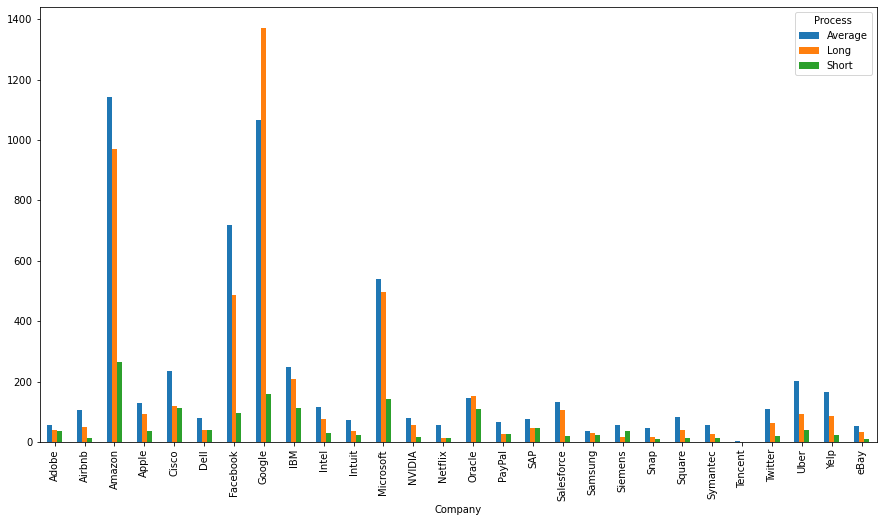

In [24]:
df.groupby(["Company", "Process"]).size().unstack(level=1).plot(kind="bar", figsize=(15, 8))